In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotting import fig_saver

In [33]:
sf = fig_saver("figures")

In [34]:
df = pd.read_csv("cristallo_c.csv", sep="\s+")

In [35]:
df["C"] = df.C12 + df.C13 + df.C14

In [36]:
MZ = df[df.IRV > 0][["Mass", "Metallicity"]].drop_duplicates()

In [37]:
for _, row in MZ.iterrows():
    M = row.Mass
    Z = row.Metallicity
    
    

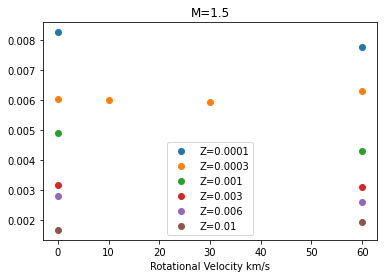

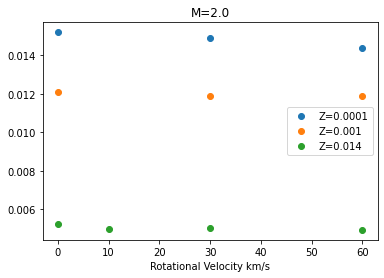

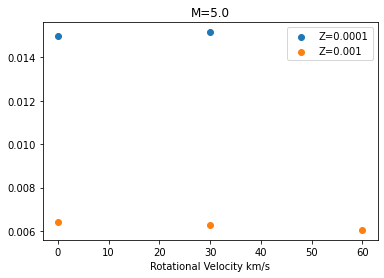

In [46]:
for M in MZ["Mass"].unique():
    Zs = MZ[MZ.Mass == M]["Metallicity"]
    
    for Z in Zs:
        filt = (df.Metallicity == Z) & (df.Mass == M)
        IRVs = df[filt].IRV.drop_duplicates()
        ys = [df[filt][df[filt].IRV == IRV]["C"] for IRV in IRVs]
        plt.scatter(IRVs, ys, label="Z=%s" % Z)
    plt.legend()
    plt.title("M=%s" % M)
    plt.xlabel("Rotational Velocity km/s")
    
    if M == 2.0:
        sf("agb_rotation")
    plt.show()

From the above plots, we can see that while there may be some impact of rotation on the AGB yields, the effect is negligible if present at all. So, for our work, we can neglect the effect of rotation on AGB yields altogether. 